In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('~/Downloads/CCRB-Complaint-Data_202007261025/allegations_20200726939.csv')
uni=pd.read_csv('~/Downloads/Copy of US Higher Education_ Value vs. Vulnerability.csv')


In [4]:
df.head(2)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [5]:
# Who has the most records?
# how often did the person get complaint?
# Race and gender of the complainent?
# what kind allegation depending on race and gender?
# which percinct has the most allegations againts?
# does getting certain amount of allegation get you arrested or fired?

In [6]:
df.head(2)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   complaint_id              33358 non-null  int64  
 5   month_received            33358 non-null  int64  
 6   year_received             33358 non-null  int64  
 7   month_closed              33358 non-null  int64  
 8   year_closed               33358 non-null  int64  
 9   command_at_incident       31814 non-null  object 
 10  rank_abbrev_incident      33358 non-null  object 
 11  rank_abbrev_now           33358 non-null  object 
 12  rank_now                  33358 non-null  object 
 13  rank_incident             33358 non-null  object 
 14  mos_et

In [44]:
offence_type=df.groupby('fado_type').count()
offence_type

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,allegation,precinct,contact_reason,outcome_description,board_disposition,time
fado_type,,,,,,,,,,,,,,,,,,,,,
Abuse of Authority,20292,20292,20292,20292,20292,20292,20292,20292,20292,19831,...,20292,17233,17404,17011,20292,20274,20156,20248,20292,20292
Discourtesy,4677,4677,4677,4677,4677,4677,4677,4677,4677,4360,...,4677,4220,4261,4177,4677,4673,4655,4670,4677,4677
Force,7636,7636,7636,7636,7636,7636,7636,7636,7636,6949,...,7636,6791,6841,6719,7635,7634,7597,7633,7636,7636
Offensive Language,753,753,753,753,753,753,753,753,753,674,...,753,650,657,639,753,753,751,751,753,753


In [30]:
year= df['year_closed']-df['year_received']
year1=year*12
year1

0        12
1        12
2        12
3        12
4        12
         ..
33353    12
33354    12
33355    12
33356    12
33357    12
Length: 33358, dtype: int64

In [28]:
month=df['month_received']-df['month_closed']
month

0        2
1        3
2        3
3       -2
4        6
        ..
33353    6
33354    6
33355    6
33356    6
33357    6
Length: 33358, dtype: int64

In [31]:
time=year1+month

0        14
1        15
2        15
3        10
4        18
         ..
33353    18
33354    18
33355    18
33356    18
33357    18
Length: 33358, dtype: int64

In [68]:
df['time']= (year1+month)
df.head(2)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,time
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),14
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),15


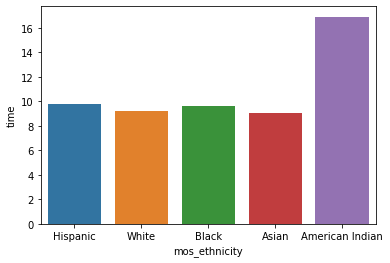

In [36]:
sns.barplot(x="mos_ethnicity", y="time", data=df, ci=False)

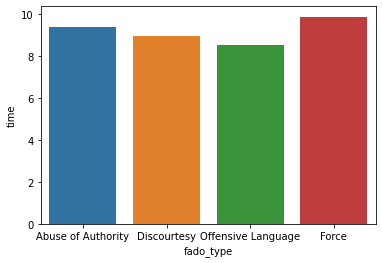

In [55]:
sns.barplot(x="fado_type", y="time",data=df, ci=False)

In [67]:
offence_type=df.groupby('last_name').count()
offence_type

,unique_mos_id,first_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,time
last_name,,,,,,,,,,,,,,,,,,,,,
Aaronson,15,15,15,15,15,15,15,15,15,15,...,14,14,14,15,15,15,15,15,15,15
Abate,3,3,3,3,3,3,3,3,3,3,...,2,2,2,3,3,3,3,3,3,3
Abbasciano,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Abbassi,21,21,21,21,21,21,21,21,21,21,...,14,14,9,21,21,21,21,21,21,21
Abdalla,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zuccaro,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Zurica,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Zurita,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


In [1]:
ax = sns.barplot(x="outcome_description", orient = 'h', data=df)

NameError: name 'sns' is not defined

In [ ]:
ax = sns.barplot(x = 'Revenue', y = 'Year', hue = 'Promo', color = '#560FE5', data = dataframe, orient = 'h', ci = False)

In [66]:
df['time'].head(50)

0     14
1     15
2     15
3     10
4     18
5     -5
6     21
7     -3
8     -5
9     -5
10    -7
11    -7
12    -5
13    30
14     8
15     8
16     8
17    14
18    14
19    12
20    -4
21    -4
22    -4
23    -4
24    -4
25    -4
26    21
27    -5
28    -5
29    -5
30    14
31    16
32    16
33    16
34    16
35    14
36    15
37    15
38     8
39     8
40     8
41     9
42    19
43    19
44    -4
45    -4
46    -4
47    19
48    19
49    10
Name: time, dtype: int64

In [65]:
df.head(50)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,time
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),14
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),15
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),15
3,10007,John,Sears,078 PCT,26146,7,2012,9,2013,PBBS,...,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),10
4,10009,Noemi,Sierra,078 PCT,40253,8,2018,2,2019,078 PCT,...,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),18
5,10012,Paula,Smith,078 PCT,37256,5,2017,10,2017,078 PCT,...,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions),-5
6,10014,Malachy,Sullivan,078 PCT,33969,11,2015,2,2016,078 PCT,...,White,Male,34.0,Offensive Language,Sexual orientation,78.0,PD suspected C/V of violation/crime - street,Summons - other violation/crime,Substantiated (Formalized Training),21
7,10017,Fazle,Tanim,078 PCT,40070,8,2018,11,2018,078 PCT,...,Asian,Male,60.0,Discourtesy,Word,78.0,Moving violation,Moving violation summons issued,Unsubstantiated,-3
8,10017,Fazle,Tanim,078 PCT,41927,3,2019,8,2019,078 PCT,...,Asian,Male,39.0,Abuse of Authority,Refusal to provide shield number,78.0,Moving violation,Moving violation summons issued,Unsubstantiated,-5
9,10017,Fazle,Tanim,078 PCT,41927,3,2019,8,2019,078 PCT,...,Asian,Male,39.0,Abuse of Authority,Retaliatory summons,78.0,Moving violation,Moving violation summons issued,Substantiated (Command Discipline A),-5
